<a href="https://colab.research.google.com/github/Mirnada/Covid_19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Covid_19


## Montando o Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Importando bibliotecas

In [67]:
import pandas as pd
from unicodedata import normalize
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/My Drive/Datasets/dados-curso-completo.csv')

## Dataset original - Estatísticas

### Informações gerias do dataset

In [11]:
df.head(10)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
5,2020-05-08 11:21:36,Marcel Silvano,marcelsilvano,"Importantes avanços! A pesquisa brasileira, a ...",4,2769,pt,Macaé,Brazil,BR,NaN,NaN,[]
6,2020-03-10 21:27:40,Teixeira Correia,LidadorNoticias,(Última hora) Volta ao Alentejo: Anulada por c...,0,39,pt,NaN,NaN,NaN,NaN,NaN,[]
7,2020-06-04 13:22:21,Thiago Moraes,ThiagoMoraesPB,João Pessoa tem queda no isolamento social por...,1,3578,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-05-07 21:32:12,PT Brasil,ptbrasil,A #tvPT de hoje vai falar sobre a pandemia na ...,10,942696,pt,NaN,NaN,NaN,NaN,NaN,['tvPT']
9,2020-03-11 20:27:49,Niquito ;),NLazaroto,O Coronavirús causou uma pandemia e eu ainda n...,0,215,pt,NaN,NaN,NaN,NaN,NaN,[]


In [12]:
# tamanho do dataset
# mais de 1,5 milhão de instancias e 13 atributos
df.shape

(1658825, 13)

In [13]:
# quantidade de valores nulos
df.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

### Descrição das colunas do Dataset

In [14]:
# nomes das colunas
df.columns

Index(['data', 'usuario', 'apelido', 'texto', 'retweet', 'seguidores',
       'idioma', 'lugar', 'pais', 'sigla', 'latitude', 'longitude',
       'hashtags'],
      dtype='object')

* data: data do tweet do usuário
* usuario: nome do usuario
* apelido: apelido do usuário
* texto: texto publicado pelo usuário
* retweet: quantidade de vezes que o tweet foi replicado
* seguidores: quantidade de seguidores do usuário
* idioma: idioma do usuário
* lugar: lugar do usuário na publicação
* pais: país do usuário na publicação
* sigla: sigla do Estado do usuário
* latitude: posição geogŕafica do usuário 
* longitude: posição geográfica do usuário

In [15]:
# verificando os tipos de dados do Dataset
df.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

### Analisando os dados numericos

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
retweet,1658825.0,197.853299,6337.641384,0.000000,0.000000,0.000000,0.000000,1.139763e+06
seguidores,1658825.0,32572.055193,368029.985029,0.000000,101.000000,380.000000,1470.000000,8.424125e+07
latitude,8720.0,-40.237583,20.808494,-123.120400,-47.864334,-43.955615,-38.453198,1.747893e+02
longitude,8720.0,-11.117100,19.169105,-37.818769,-23.305300,-19.624400,-7.120700,5.825778e+01


Ao gerar alguns dados estatísticos, podemos notar:

* a variável *retweet* tem como valor máximo 1139763, isso quer dizer que uma publicação específica foi replicada mais de 1 milhão de vezes, assim como a variável *seguidores* nos mostra que um determinado usuário possui aproximadamente 8,5 milhões de seguidores 

* as colunas *retweet* e *seguidores* possui uma grande discrepância em sua distribuição de frequencia. Em *retweet*, todos os valores estão acima do 3º quartil, indicando que 75% dos valores são iguais a zero.


### Analisando os dados categóricos

In [17]:
df['sigla'].value_counts()

BR    67247
PT     2675
US     1068
IT      484
ES      379
      ...  
KR        1
AD        1
MC        1
SI        1
GF        1
Name: sigla, Length: 120, dtype: int64

Aproximadamente 90% dos dados são do Brasil

*Obs: apenas os dados que contem a sigla do país

In [18]:
(df['sigla'].value_counts()['BR']/df['sigla'].value_counts().sum())*100

90.14947382532341

## Dataset DuvidasDB

In [20]:
duvidasDB = df[df['texto'].str.contains('?', regex=False)].copy()
duvidasDB.reset_index(drop=True, inplace=True)
duvidasDB['texto'] = duvidasDB.texto.str.lower()
duvidasDB['texto'] = duvidasDB.texto.apply(lambda txt: normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII'))

duvidasDB.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@bolsonarosp cade o fundao deputado??? congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-04-01 21:11:07,🚩,santosodeto,fumaca de cigarro pode propagar coronavirus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesmd @dr_pampers sera que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,prioridade ?!\n\n #covid19 #floripa #isolament...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"que tal uma noticia boa, indo na contramao do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[]


###Visão Geral dos Dados "duvidasDB"

In [35]:
dfn = duvidasDB
dfn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
retweet,172501.0,123.877137,4714.103506,0.000000,0.000000,0.000000,0.000000,6.165690e+05
seguidores,172501.0,12244.941235,227150.310261,0.000000,78.000000,296.000000,1020.000000,1.310412e+07
latitude,594.0,-42.739200,16.340911,-118.291855,-48.190162,-45.280150,-38.634174,1.516286e+02
longitude,594.0,-14.001684,16.266415,-34.823600,-23.498240,-20.451828,-8.060902,5.288644e+01


In [36]:
#Contagem de dados ausentes
dfn.isnull().sum()

data               0
usuario            6
apelido            0
texto              0
retweet            0
seguidores         0
idioma             0
lugar         164672
pais          164672
sigla         164672
latitude      171907
longitude     171907
hashtags           0
dtype: int64

In [60]:
# Número de linhas e colunas.
dfn.shape

(172501, 13)

In [51]:
# Total por pais
dfn.pais.value_counts()

Brazil                        7148
Portugal                       243
United States                  101
Italy                           45
United Kingdom                  42
Spain                           34
France                          23
Canada                          22
Republic of Mozambique          21
Argentina                       17
Ireland                         12
Angola                           8
Japan                            8
Chile                            6
Colombia                         6
Switzerland                      5
Belgium                          5
Germany                          5
India                            4
Peru                             4
Australia                        4
New Zealand                      4
Bahrain                          4
Nigeria                          4
Uruguay                          3
The Netherlands                  3
Austria                          3
People's Republic of China       3
South Africa        

### Informações gerais do novo dataset

In [21]:
#Informações da Base
duvidasDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172501 entries, 0 to 172500
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   data        172501 non-null  object 
 1   usuario     172495 non-null  object 
 2   apelido     172501 non-null  object 
 3   texto       172501 non-null  object 
 4   retweet     172501 non-null  int64  
 5   seguidores  172501 non-null  int64  
 6   idioma      172501 non-null  object 
 7   lugar       7829 non-null    object 
 8   pais        7829 non-null    object 
 9   sigla       7829 non-null    object 
 10  latitude    594 non-null     float64
 11  longitude   594 non-null     float64
 12  hashtags    172501 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 17.1+ MB


##Convertendo o tipo do campo data de "object" em "datetime"

In [63]:
dfn['data'] = pd.to_datetime(dfn['data'])
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172501 entries, 0 to 172500
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        172501 non-null  datetime64[ns]
 1   usuario     172495 non-null  object        
 2   apelido     172501 non-null  object        
 3   texto       172501 non-null  object        
 4   retweet     172501 non-null  int64         
 5   seguidores  172501 non-null  int64         
 6   idioma      172501 non-null  object        
 7   lugar       7829 non-null    object        
 8   pais        7829 non-null    object        
 9   sigla       7829 non-null    object        
 10  latitude    594 non-null     float64       
 11  longitude   594 non-null     float64       
 12  hashtags    172501 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 17.1+ MB


##Criando uma coluna com o Mês

In [64]:
dfn['mês'] = dfn['data'].dt.month
dfn.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,mês
0,2020-03-23 18:51:14,Gaboardi,fraslee,@bolsonarosp cade o fundao deputado??? congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],3
1,2020-04-01 21:11:07,🚩,santosodeto,fumaca de cigarro pode propagar coronavirus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],4
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesmd @dr_pampers sera que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],6
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,prioridade ?!\n\n #covid19 #floripa #isolament...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",4
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"que tal uma noticia boa, indo na contramao do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],3


##Usando a função "Groupby" e "sum" para visualizar o período de mais retweet na base "duvidasDB"

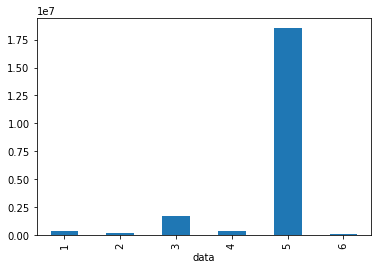

In [74]:
dfn.groupby(dfn['data'].dt.month)['retweet'].sum().plot.bar()
#dfn.groupby([dfn['data'].dt.month, [['id']].count().rename(columns={'id': 'Total'})

### Informações dos temas discutidos

* Doença
* Medicamentos
* Tratamentos
* Pessoas

In [23]:
# lista de palavras chaves para cada título

doenca = ['covid', 'covid-19', 'covid19','coronavirus','covid_19','gripezinha','sars','epidemia', 'animais', 'transmissao', 'espiro', 'febre', 'pandemia', 'cvd', 'virus']
medicamento = ['tratamento', 'remedio','cloroquina','hidroxicloroquina','vermictina','novalgina', 'dipirona', 'dexametasona', 'azitromicina', 'corticoides']
organização = ['oms','stf','pt','pf','cnn','globo','cnnbrasil','ministério','banco','onubrasil','onu','anvisa']
pessoa = ['jair', 'bolsonaro', 'jair bolsonaro', 'jairbolsonaro','presidente','bozo','bosonaro', 'bozonaro','mandetta','trump','lula','doria','haddad','gilmar mendes','osmar terra', 'ormarterra','ditadoria']

In [ ]:
doencaDB = duvidasDB[duvidasDB['texto'].str.contains(('|').join(doenca))].copy()
doencaDB.reset_index(drop=True, inplace=True)
doencaDB['texto']

0        @bolsonarosp cade o fundao deputado??? congres...
1        fumaca de cigarro pode propagar coronavirus? h...
2        prioridade ?!\n\n #covid19 #floripa #isolament...
3        @josemedeirosmt seria isso algum tipo aleatori...
4        "nova york e o novo epicentro da pandemia de c...
                               ...                        
87825    @acruz39 andas a fazer tratamentos ao coronavi...
87826    @0n3p1ece @alexmono oh jumentinha, 1918 e isso...
87827    @biologiabraba @tati_cordeiro so vontade ou vo...
87828    oms: tamo tendo pandemia evitar\n conglomerado...
87829    @osmarterra sr. osmar terra, gostaria de ouvir...
Name: texto, Length: 87830, dtype: object

In [ ]:
medicaDB = duvidasDB[duvidasDB['texto'].str.contains(('|').join(medicamento))].copy()
medicaDB.reset_index(drop=True, inplace=True)
medicaDB['texto'].loc[0:5]

0    @bbcbrasil @cavmota a pergunta que nao quer ca...
1    problemas no paraiso da cloroquina? e essa tre...
2    @veramagalhaes verba 792k,  fale sobre a cloro...
3    @gilmarmendes ue ?! mas a cloroquina nao recom...
4    sera que a renata vai tomar cloroquina william...
5    @cnnbrasil so a cloroquina ja derruba os dois ...
Name: texto, dtype: object

In [26]:
pessoaDB = duvidasDB[duvidasDB['texto'].str.contains(('|').join(pessoa))].copy()
pessoaDB.reset_index(drop=True, inplace=True)
pessoaDB['texto'].loc[0]

'@bolsonarosp cade o fundao deputado??? congresso esta sentado em 3bi olhando a pandemia da janela.'

In [ ]:
orgDB = duvidasDB[duvidasDB['texto'].str.contains(('|').join(organização))].copy()
orgDB.reset_index(drop=True, inplace=True)
orgDB['texto']

0       que tal uma noticia boa, indo na contramao do ...
1       @janainadobrasil a sra pode de ir   catar coqu...
2       @gilmarmendes ue ?! mas a cloroquina nao recom...
3       sera que a renata vai tomar cloroquina william...
4       @amorimvivian_ giiiiii ??? ta se cuidando dire...
                              ...                        
9642    @katiaabreu mas voce vai da cloroquina pra teu...
9643    #grandedebatecnn tiago anastacio, falou q falt...
9644    adivinhem a casa de quem que ta cheia de paren...
9645    @zugrs mas a oms nao tem um protocolo mundial ...
9646    oms: tamo tendo pandemia evitar\n conglomerado...
Name: texto, Length: 9647, dtype: object

### Analisando o texto

In [ ]:
textos = df['texto']
print (textos)

0          @BolsonaroSP Cade o fundão deputado??? Congres...
1          Em ação preventiva, o Governo do Estado suspen...
2          Incrível como os defensores do fim do distanci...
3          Fumaça de cigarro pode propagar coronavírus? h...
4          🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
                                 ...                        
1658820    oms: tamo tendo pandemia evitar\n conglomerado...
1658821    @OsmarTerra Sr. Osmar Terra, gostaria de ouvir...
1658822    CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...
1658823    #BolsonaroTemRazaoSim porque, quando a prefeit...
1658824    Em meio a uma pandemia, estamos na luta também...
Name: texto, Length: 1658825, dtype: object


###Quebrando o texto em palavras

In [ ]:
texto_quebra = textos.str.split()
print (texto_quebra)

0          [@BolsonaroSP, Cade, o, fundão, deputado???, C...
1          [Em, ação, preventiva,, o, Governo, do, Estado...
2          [Incrível, como, os, defensores, do, fim, do, ...
3          [Fumaça, de, cigarro, pode, propagar, coronaví...
4          [🚨Todos, juntos, contra, COVID-19💪, Solicite, ...
                                 ...                        
1658820    [oms:, tamo, tendo, pandemia, evitar, conglome...
1658821    [@OsmarTerra, Sr., Osmar, Terra,, gostaria, de...
1658822    [CIENTISTA, DE, HARVARD, PREVÊ, QUE, ATÉ, 70%,...
1658823    [#BolsonaroTemRazaoSim, porque,, quando, a, pr...
1658824    [Em, meio, a, uma, pandemia,, estamos, na, lut...
Name: texto, Length: 1658825, dtype: object


###Analisando o primeiro indice 

In [ ]:
print (texto_quebra[0])

['@BolsonaroSP', 'Cade', 'o', 'fundão', 'deputado???', 'Congresso', 'está', 'sentado', 'em', '3BI', 'olhando', 'a', 'pandemia', 'da', 'janela.']


Contando a quantidade de palavras do primeiro indice

In [ ]:
len(texto_quebra[0])

15

In [ ]:
data = df.texto
print (data[0])
inicio = data[0].find('?')
print (inicio)
#fim = data[0].find('', inicio)
#print (fim)
#host = data[inicio +1 : fim]
#print (host)

@BolsonaroSP Cade o fundão deputado??? Congresso está sentado em 3BI olhando a pandemia da janela.
35


###Percorrendo os elementos da Lista 

In [ ]:
palavras = df.texto
i = 0
while i < len(palavras):
  print (palavras[i])
  i = i + 1


###Usando a função enumerate para visualizar o conjunto de palavras

In [ ]:
for cont in enumerate(texto_quebra): 
  print (cont)